In [7]:
import pandas as pd
import seaborn as sns
import numpy as np 
import zipfile
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

# open zipped dataset
with zipfile.ZipFile("PregnancyData.zip") as z:
   # open the csv file in the dataset
   with z.open("PregnancyData.csv") as f:
     # read the dataset
      df = pd.read_csv(f)

In [8]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


<AxesSubplot: >

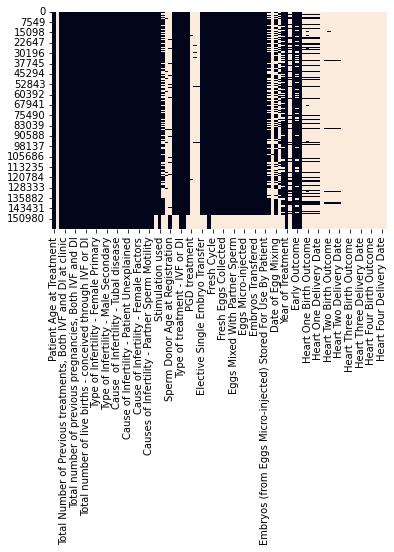

In [9]:
#Heatmap of missing data
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Original number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count)
col_mod = mod_df.columns

# Adding new Embryos Transfered column to mod_df from df
mod_df['Embryos Transfered'] = df['Embryos Transfered']

print('New number of columns :', len(col_mod))
print(mod_df.columns)

Original number of columns : 95
New number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infer

In [12]:
# obtaining the shape and size of mod_df after removing and adding columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [13]:
# Dropping more columns
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Partner Sperm Concentration', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Female Factors', axis=1, inplace = True)
mod_df.drop('Causes of Infertility - Partner Sperm Motility', axis=1, inplace = True)
mod_df.drop('Cause of Infertility -  Partner Sperm Immunological factors', axis=1, inplace = True)
mod_df.drop('Specific treatment type', axis=1, inplace = True)

# obtaining the shape and size of mod_df after removing more columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

In [14]:
print(mod_df.nunique())

Patient Age at Treatment                                7
Total Number of Previous IVF cycles                     7
Total number of IVF pregnancies                        12
Total number of live births - conceived through IVF     6
Type of Infertility - Female Primary                    2
Type of Infertility - Female Secondary                  2
Type of Infertility - Male Primary                      2
Type of Infertility - Male Secondary                    2
Type of Infertility -Couple Primary                     2
Type of Infertility -Couple Secondary                   2
Cause  of Infertility - Tubal disease                   2
Cause of Infertility - Ovulatory Disorder               2
Cause of Infertility - Male Factor                      2
Cause of Infertility - Patient Unexplained              2
Cause of Infertility - Endometriosis                    2
Cause of Infertility - Cervical factors                 2
Cause of Infertility -  Partner Sperm Morphology        2
Stimulation us

In [15]:
# Show each unique value in every column
for col in mod_df:
    print(col)
    print(mod_df[col].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999']
Total Number of Previous IVF cycles
['2' '3' '0' '5' '4' '1' '>=5']
Total number of IVF pregnancies
[0 1 2 4 3 5 '0' '1' '2' '3' '4' '>=5']
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'not assigned' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number

In [16]:
# Fixing outliers and errors in data
mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
mod_df.drop(mod_df.index[mod_df['Sperm From'] == 'not assigned'], inplace = True)
mod_df['Patient Age at Treatment'].replace({'40-42': 41, '45-50': 47.5, '35-37': 36, '18 - 34': 26, '43-44': 43.5, '38-39': 38.5}, inplace=True)
mod_df['Total Number of Previous IVF cycles'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Total number of IVF pregnancies'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Sperm From'].replace({'Partner': 0, 'Donor': 1, 'Partner & Donor': 2}, inplace=True)
mod_df['Patient Age at Treatment'].replace({'40-42': 0, '45-50': 1, '35-37': 2, '18 - 34': 3, '43-44': 4, '38-39': 5}, inplace=True)
# mod_df['Total number of live births - conceived through IVF'].replace({2: 1, 3: 1, 4: 1, 5: 1}, inplace=True)
mod_df.fillna(value=int(mod_df['Embryos Transfered'].mean()), inplace=True)

In [17]:
# Checking each unique value in every column
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 2 4 3 5 6]
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
[0 1 2]
Number of Live Births
[1 0 2 3 4]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1. 2. 0. 3.]


In [18]:
# obtaining the shape and size of mod_df after fixing outliers and errors in data
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (156025, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

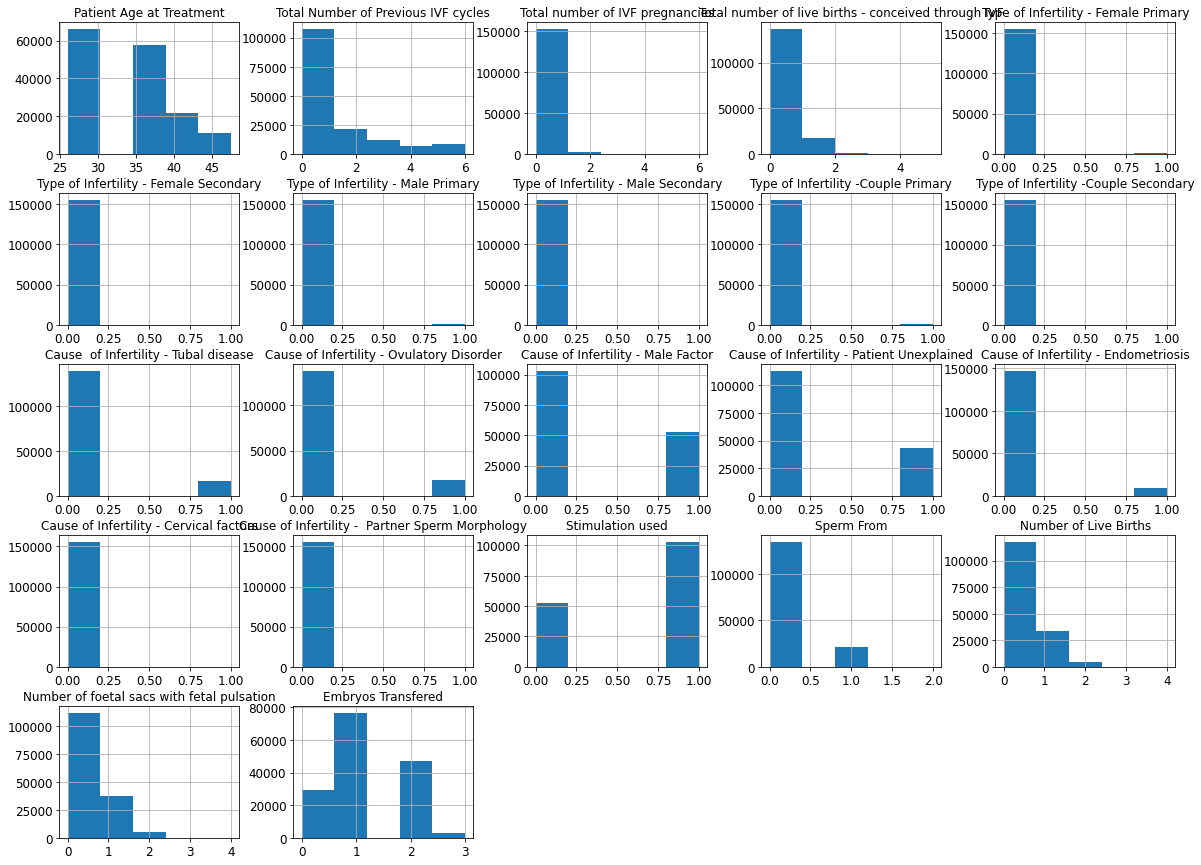

In [19]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(20,15))
plt.show()

<AxesSubplot: >

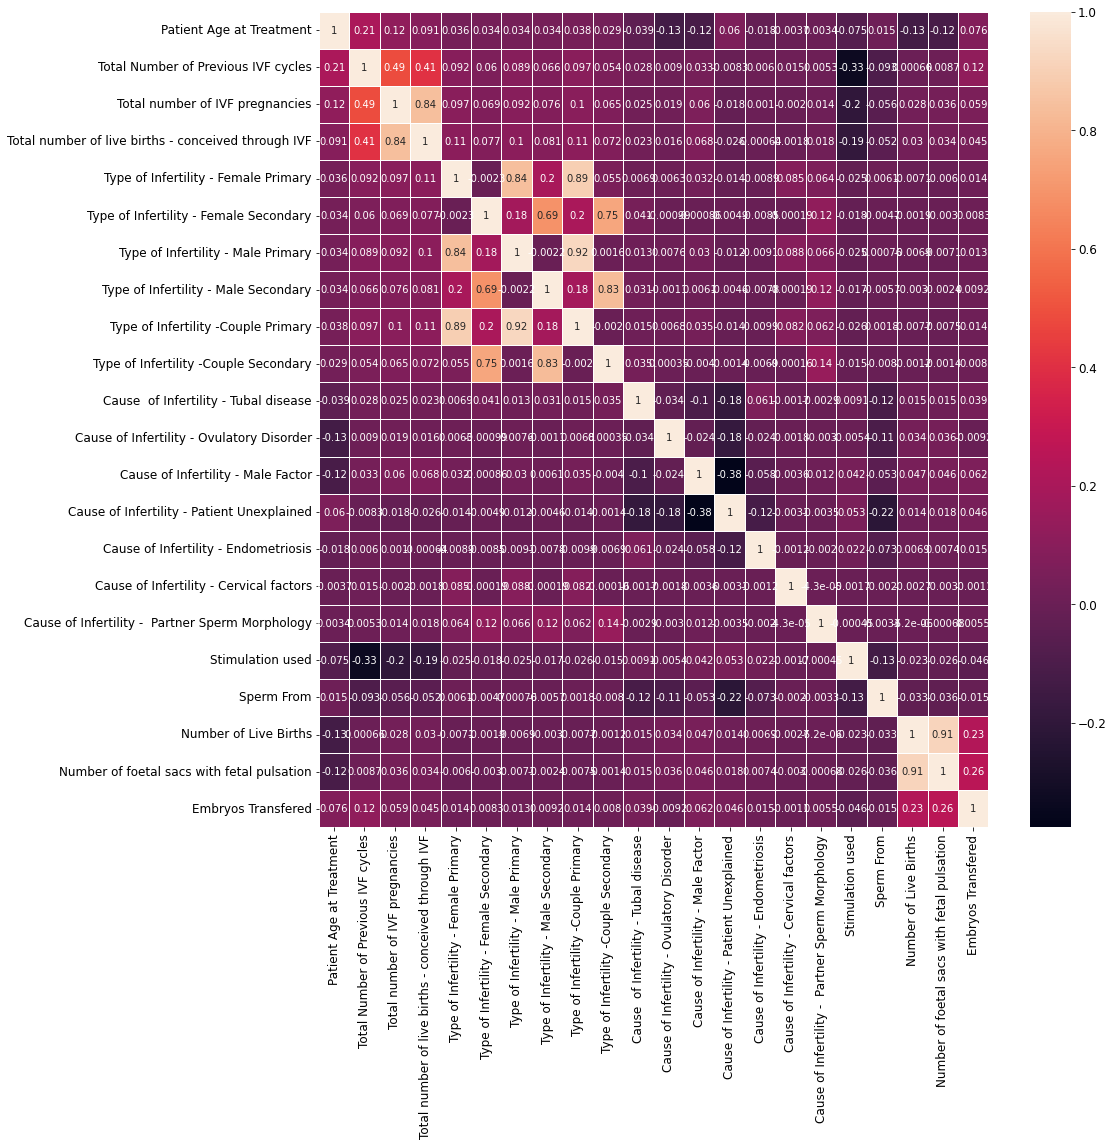

In [20]:
fig, ax = plt.subplots(figsize=(15,15))  # Sample figsize in inches
sns.heatmap(mod_df.corr(), annot=True, linewidths=.5, ax=ax)

In [21]:
# Add a new column named 'LiveBirth'
mod_df['LiveBirth'] = [1 if x >= 1 else 0 for x in mod_df['Total number of live births - conceived through IVF']]

# Print number of 0s and 1s in target column
print(mod_df['LiveBirth'].value_counts())

0    137162
1     18863
Name: LiveBirth, dtype: int64


In [22]:
#target_columns 
Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth']
y = ['LiveBirth']
#feature_columns 
x = [c for c in mod_df.columns if c not in Y]

print(y)
print(x)

['LiveBirth']
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Sperm From', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(mod_df[x], mod_df[y], test_size=0.2, random_state=0, stratify = mod_df[y])

In [24]:
smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
print(y_train_smt.value_counts())

LiveBirth
0            109730
1            109730
dtype: int64


In [25]:
# Scaling the training data
std_scaler = StandardScaler()
std_scaler.fit_transform(X_train, y_train)

array([[-1.0939189 , -0.78735755, -0.4040814 , ..., -0.39378557,
        -0.58715575, -0.21018031],
       [ 1.49099455,  2.44855729,  1.82038011, ..., -0.39378557,
        -0.58715575, -1.57217313],
       [ 0.75244785,  2.44855729, -0.4040814 , ..., -0.39378557,
        -0.58715575, -0.21018031],
       ...,
       [ 0.75244785, -0.78735755, -0.4040814 , ..., -0.39378557,
         1.26329067, -0.21018031],
       [-1.0939189 , -0.78735755, -0.4040814 , ..., -0.39378557,
        -0.58715575, -1.57217313],
       [-1.0939189 , -0.78735755, -0.4040814 , ..., -0.39378557,
        -0.58715575, -1.57217313]])

In [26]:
# Analyzing whether to use bootstrap or not
# - avg run time: 3m 44s 
# - result: {'bootstrap': (default) [True], 'max_features': 5, 'n_estimators': 100}

''' from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 50, 100], 'max_features': [5, 10, 15]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100], 'max_features': [5, 10, 15]}]


forest_cl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

print(grid_search.score)

grid_search.best_params_ '''

" from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = [\n    {'n_estimators': [10, 50, 100], 'max_features': [5, 10, 15]},\n    {'bootstrap': [False], 'n_estimators': [10, 50, 100], 'max_features': [5, 10, 15]}]\n\n\nforest_cl = RandomForestClassifier(random_state=42)\n\ngrid_search = GridSearchCV(forest_cl, param_grid, cv=5,\n                           scoring='neg_mean_squared_error',\n                           return_train_score=True)\n\ngrid_search.fit(X_train, y_train)\n\nprint(grid_search.score)\n\ngrid_search.best_params_ "

In [27]:
# Determining optimal number of decision trees and maximum features for RandomForrestClassifier
# - avg run time: 23m 3s
# - result: {'max_features': 4, 'n_estimators': 400}

''' from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [3, 4, 5, 6, 7], 'n_estimators': [100, 200, 300, 400, 500]}]


forest_cl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_ '''

" from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = [\n    {'max_features': [3, 4, 5, 6, 7], 'n_estimators': [100, 200, 300, 400, 500]}]\n\n\nforest_cl = RandomForestClassifier(random_state=42)\n\ngrid_search = GridSearchCV(forest_cl, param_grid, cv=5,\n                           scoring='neg_mean_squared_error',\n                           return_train_score=True)\n\ngrid_search.fit(X_train, y_train)\n\ngrid_search.best_params_ "

In [28]:
# Determining the optimal tree depth and maximum number of leaf node (without overfitting) for RandomForrestClassifier
''' 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [4], 'n_estimators': [400], 'max_depth': [10, 20, 30], 'max_leaf_nodes': [20, 40, 60, 80]}]


forest_cl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_ '''

" \nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = [\n    {'max_features': [4], 'n_estimators': [400], 'max_depth': [10, 20, 30], 'max_leaf_nodes': [20, 40, 60, 80]}]\n\n\nforest_cl = RandomForestClassifier(random_state=42)\n\ngrid_search = GridSearchCV(forest_cl, param_grid, cv=5,\n                           scoring='neg_mean_squared_error',\n                           return_train_score=True)\n\ngrid_search.fit(X_train, y_train)\n\ngrid_search.best_params_ "

In [31]:
# Optimizing number of trees
# - result: Optimal number of trees 390 ~ 400

''' from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
model = RandomForestClassifier(n_estimators=1,  random_state=42)    

model.max_features = 4
model.max_depth = 10
model.max_leaf_nodes = 60

def FindOptimalTrees(X_train, y_train, X_test, y_test, model) :
    highscore = -1
    current_score = 0
    last_score = 0
    stop = False;
    interval = 10
    prefixPositive = True
    iteration = 0
    low_improvement_iter = 0
    perform_differ = 0
    n_estimators = 380
    
    while (not stop) :
        st = time.time()
                
        # Train model
        model.n_estimators = n_estimators
        model.fit(X_train, y_train)
        
        # Get performance score
        current_score = model.score(X_test, y_test)
        
        # Calculate performance difference between current and last score
        perform_differ = current_score - last_score
        
        # If current score is higher than the highscore
        # set the new highscore to current score
        if current_score > highscore:
            highscore = current_score
        
        # Else check if score has not improved significantly over the last 4 iterations
        else:
            # If not, stop
            if low_improvement_iter > 3 :
                stop = True
                break
            # Else divide the next tree-interval-increase in half
            else:                
                interval = (int)(interval / 2)
                
                # If performance is worse than the last iteration go the other direction
                if perform_differ < 0:
                    prefixPositive = not prefixPositive
            
        if prefixPositive:
            n_estimators += interval
        else:
            n_estimators -= interval
        
        
        if perform_differ < 0.001:
            low_improvement_iter += 1

        last_score = current_score

        # Increment iteration count
        iteration += 1

        # Calculate elapsed time for current iteration
        et = time.time()
        elapsed_time = et - st
        
        print('Iteration:', iteration, ' ... Best score:', '%.4f' % highscore, '... Performance increase: ', '%.6f' % perform_differ, 
                '... Number of trees: ', n_estimators, '... Interval', interval, '... Elapsed time:', "%.2f" % elapsed_time, 's', 
                '... Iterations with low performance increase: ', low_improvement_iter)
        
    
    print('Final highscore:', highscore)
            
        
FindOptimalTrees(X_train, y_train, X_test, y_test, model) '''

' from sklearn.ensemble import RandomForestClassifier\nimport time\nfrom sklearn.metrics import accuracy_score \nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\n    \nmodel = RandomForestClassifier(n_estimators=1,  random_state=42)    \n\nmodel.max_features = 4\nmodel.max_depth = 10\nmodel.max_leaf_nodes = 60\n\ndef FindOptimalTrees(X_train, y_train, X_test, y_test, model) :\n    highscore = -1\n    current_score = 0\n    last_score = 0\n    stop = False;\n    interval = 10\n    prefixPositive = True\n    iteration = 0\n    low_improvement_iter = 0\n    perform_differ = 0\n    n_estimators = 380\n    \n    while (not stop) :\n        st = time.time()\n                \n        # Train model\n        model.n_estimators = n_estimators\n        model.fit(X_train, y_train)\n        \n        # Get performance score\n        current_score = model.score(X_test, y_test)\n        \n        # Calculate performance difference between current and l

In [99]:
# Using estimated hyperparameters to train RandomForrestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest_cl = RandomForestClassifier(random_state=42)

forest_cl.max_features = 4
forest_cl.n_estimators = 400
forest_cl.max_depth = 10
forest_cl.max_leaf_nodes = 60

forest_cl.fit(X_train, y_train)

y_pred = forest_cl.predict(X_test)

# Printing performance score

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Clasification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[26261  1171]
 [    2  3771]]
Clasification report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     27432
           1       0.76      1.00      0.87      3773

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205



'              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98     27432\n           1       0.76      1.00      0.87      3773\n\n    accuracy                           0.96     31205\n   macro avg       0.88      0.98      0.92     31205\nweighted avg       0.97      0.96      0.96     31205\n'

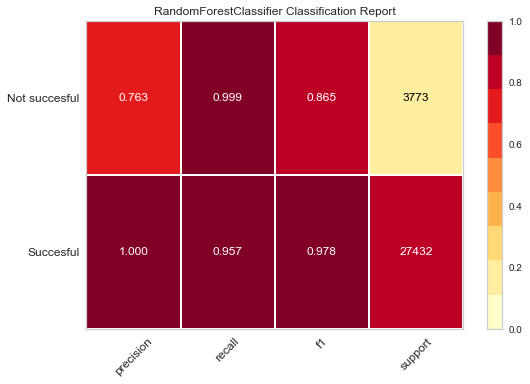

<AxesSubplot: title={'center': 'RandomForestClassifier Classification Report'}>

In [114]:
from yellowbrick.classifier import ClassificationReport

# Specify the target classes
classes = ["Succesful", "Not succesful"]
visualizer = ClassificationReport(forest_cl, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

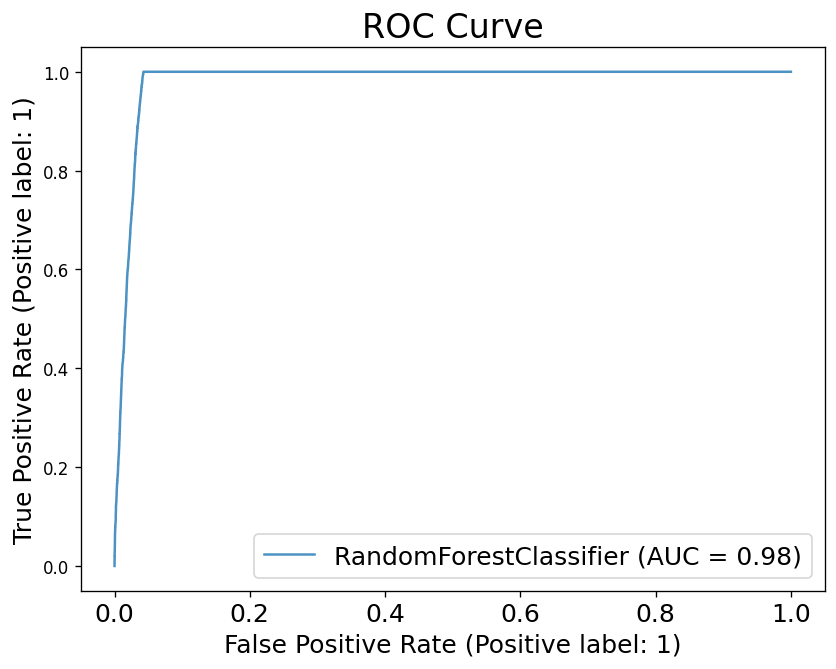

In [97]:
# Plotting convergence

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=120)

forest_cl = RandomForestClassifier(random_state=42)

forest_cl.max_features = 4
forest_cl.n_estimators = 400
forest_cl.max_depth = 10
forest_cl.max_leaf_nodes = 60

forest_cl.fit(X_train, y_train)

ax = plt.gca()
ax.set_title("ROC Curve", fontdict={'fontsize': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=15)
plt.rc('legend', fontsize=15)  
rfc_disp = RocCurveDisplay.from_estimator(forest_cl, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

Text(0, 0.5, 'Mean decrease in impurity')

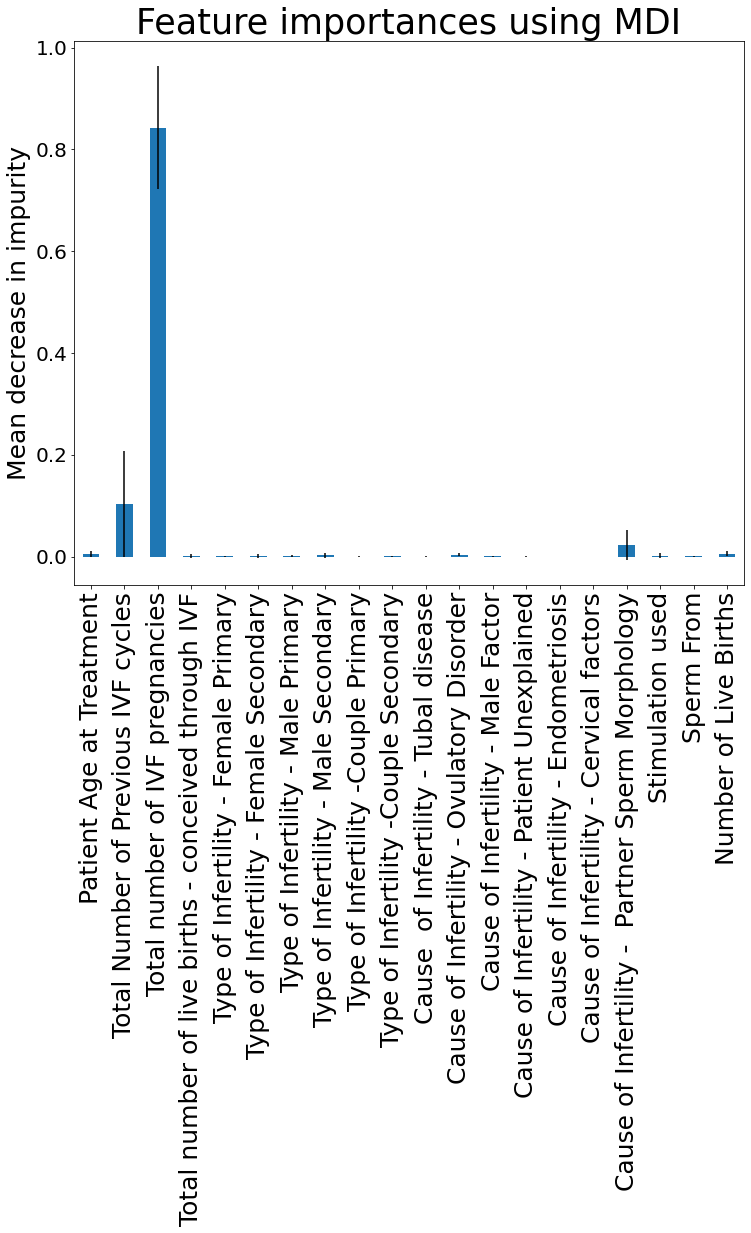

In [91]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure

feature_names = mod_df.columns[0:forest_cl.feature_importances_.size]
std = np.std([tree.feature_importances_ for tree in forest_cl.estimators_], axis=0)

forest_cl = RandomForestClassifier(random_state=42)

forest_cl.max_features = 4
forest_cl.n_estimators = 400
forest_cl.max_depth = 10
forest_cl.max_leaf_nodes = 60

forest_cl.fit(X_train, y_train)

forest_importances = pd.Series(forest_cl.feature_importances_, index=feature_names)

fig, ax = plt.subplots(figsize=(12, 10))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=25)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI", fontdict={'fontsize': 35})
ax.set_ylabel("Mean decrease in impurity")

In [ ]:
# Fine tuning hyperparameters for RandomForrestClassifier
from sklearn.ensemble import ExtraTreesClassifier

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [20, 50, 100, 200], 'max_features': [2, 3, 4]}]

extra_trees_cl = ExtraTreesClassifier(random_state=42)

grid_search = GridSearchCV(extra_trees_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 200}

In [ ]:
# Using estimated hyperparameters to train ExtraTreesClassifier

extra_trees_cl.max_features = 4
extra_trees_cl.n_estimators = 400
extra_trees_cl.max_depth = 10
extra_trees_cl.max_leaf_nodes = 60

extra_trees_cl.fit(X_train, y_train)

y_pred = extra_trees_cl.predict(X_test)

# Printing Accuracy score
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred, ))
print('Clasification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[26469   963]
 [  426  3347]]
Clasification report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     27432
           1       0.78      0.89      0.83      3773

    accuracy                           0.96     31205
   macro avg       0.88      0.93      0.90     31205
weighted avg       0.96      0.96      0.96     31205

